In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(1)

In [3]:
def load_data(train_batch_size, test_batch_size):
    # Fetch training data: total 60000 samples
        
    trainset = datasets.MNIST('data', train = True, download = False, 
                transform = transforms.Compose([
                transforms.Resize((32,32)),
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
                ]))
    temp = torch.tensor(np.random.randint(0, 10, (len(trainset)),))
    print(temp)
    trainset.targets = temp
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size, shuffle=True)

    testset = datasets.MNIST('data', train = False, 
                transform = transforms.Compose([
                transforms.Resize((32, 32)),
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
                ]))
    test_loader = torch.utils.data.DataLoader(testset ,batch_size = test_batch_size, shuffle=True)

    return (train_loader, test_loader)

In [4]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        return x

In [5]:
train_batch_size = 100
test_batch_size = 100
train_loader, test_loader = load_data(train_batch_size, test_batch_size)

tensor([6, 6, 7,  ..., 8, 9, 9], dtype=torch.int32)


In [6]:
def train(model, optimizer, epoch, train_loader, log_interval):
    model.train()
    loss_fn = torch.nn.CrossEntropyLoss()
    n_correct = 0
    n_samples = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()

        optimizer.step()

        _, predicted = torch.max(output.data, 1)
        n_samples += target.size(0)
        n_correct += (predicted == target).sum().item()
        acc = 100.0 * n_correct / n_samples
        # print log
        
        if batch_idx % log_interval == 0:
            print('Train set, Epoch {} [{}/{}]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                loss.data))
            print("Train Accuracy: ", round(acc,2))
    return loss.data, round(acc,2)

In [7]:
def test(model, epoch, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

    for data, target in test_loader:
        data, target = Variable(data), Variable(target)
        
        output = model(data)
        loss = loss_fn(output, target)
        test_loss = test_loss + loss.data

        pred = np.argmax(output.data, axis = 1)
        correct = correct + np.equal(pred, target.data).sum()

    # Print log
    test_loss /= len(test_loader.dataset)
    print('\nTest set, Epoch {} , Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(epoch,
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return loss.data

In [8]:
model = LeNet()

optimizer = optim.Adam(model.parameters(), lr=0.0001)
m1_train_loss_arr = []
m1_test_loss_arr = []

epochs = 3
log_interval = 500
for epoch in range(1, epochs + 1):
    loss, acc = train(model, optimizer, epoch, train_loader, log_interval = log_interval)
    m1_train_loss_arr.append(loss)
    loss_test = test(model, epoch, test_loader)
    m1_test_loss_arr.append(loss_test)

Train set, Epoch 1 [0/60000]	Loss: 2.328298
Train Accuracy:  6.0
Train set, Epoch 1 [50000/60000]	Loss: 2.304961
Train Accuracy:  10.17


C:\Users\nikhi\anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set, Epoch 1 , Average loss: 2.3046, Accuracy: 1123/10000 (11%)

Train set, Epoch 2 [0/60000]	Loss: 2.303923
Train Accuracy:  7.0
Train set, Epoch 2 [50000/60000]	Loss: 2.301342
Train Accuracy:  10.26

Test set, Epoch 2 , Average loss: 2.3048, Accuracy: 867/10000 (9%)

Train set, Epoch 3 [0/60000]	Loss: 2.296128
Train Accuracy:  17.0
Train set, Epoch 3 [50000/60000]	Loss: 2.307105
Train Accuracy:  10.41

Test set, Epoch 3 , Average loss: 2.3071, Accuracy: 580/10000 (6%)

Train set, Epoch 4 [0/60000]	Loss: 2.293747
Train Accuracy:  18.0
Train set, Epoch 4 [50000/60000]	Loss: 2.301102
Train Accuracy:  10.73

Test set, Epoch 4 , Average loss: 2.3064, Accuracy: 947/10000 (9%)

Train set, Epoch 5 [0/60000]	Loss: 2.300078
Train Accuracy:  13.0
Train set, Epoch 5 [50000/60000]	Loss: 2.301991
Train Accuracy:  11.2

Test set, Epoch 5 , Average loss: 2.3093, Accuracy: 343/10000 (3%)

Train set, Epoch 6 [0/60000]	Loss: 2.302622
Train Accuracy:  12.0
Train set, Epoch 6 [50000/60000]	Loss: 2.

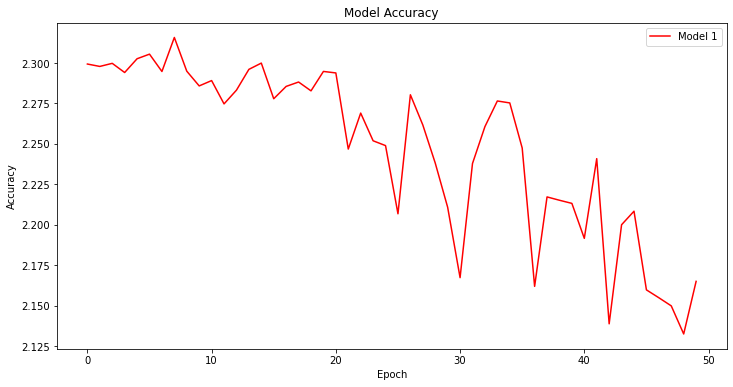

In [39]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 50, 1), m1_train_loss_arr, color = "r")
#plt.plot(np.arange(1, 500, 1), m1_acc_arr, color = "g")
plt.title('Model Accuracy')
plt.legend(['Model 1', 'Model 2'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [33]:
temp_1 = []
for i in m1_train_loss_arr:
    temp_1.append(i.data.numpy().tolist())
temp_2 = []
for i in m1_test_loss_arr:
    temp_2.append(i.data.numpy().tolist())

In [2]:
temp_2

NameError: name 'temp_2' is not defined